
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#### Reading Data

In [2]:
data=pd.read_excel("solar radiation dataset.xlsx")
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,2016-01-12 00:00:00,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,2016-01-12 00:00:00,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,2016-01-12 00:00:00,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,2016-01-12 00:00:00,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [3]:
data.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [4]:
data.rename(columns={"Data":"Date"},inplace=True)

In [5]:
data.shape

(32686, 11)

#### Data Exploration and Data Visualization

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Date                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [7]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [8]:
data.isnull().sum()

UNIXTime                  0
Date                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [9]:
data.dtypes

UNIXTime                    int64
Date                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

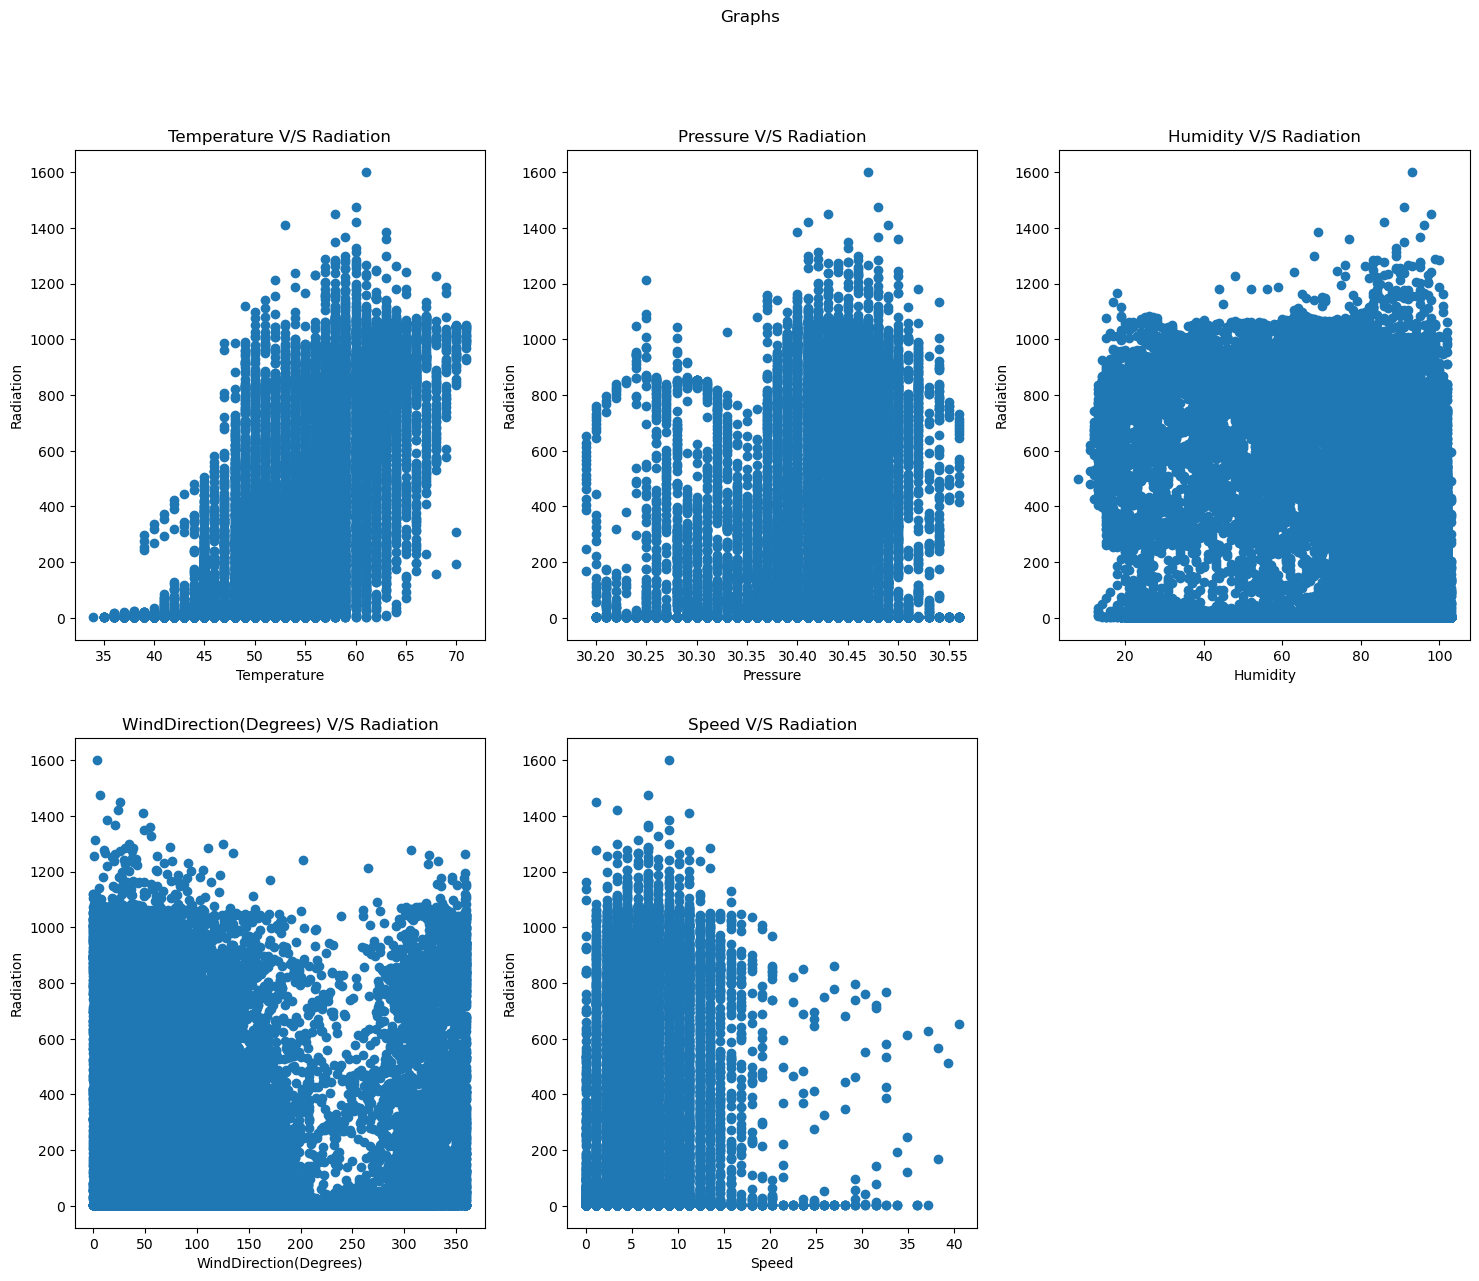

In [10]:
plt.figure(figsize=(18,14))
plt.suptitle("Graphs")
plt.subplot(2,3,1)   
plt.scatter(data["Temperature"],data["Radiation"])
plt.title("Temperature V/S Radiation")
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.subplot(2,3,2)   
plt.scatter(data["Pressure"],data["Radiation"])
plt.title("Pressure V/S Radiation")
plt.xlabel('Pressure')
plt.ylabel('Radiation')
plt.subplot(2,3,3)   
plt.scatter(data["Humidity"],data["Radiation"])
plt.title("Humidity V/S Radiation")
plt.xlabel('Humidity')
plt.ylabel('Radiation')
plt.subplot(2,3,4)   
plt.scatter(data["WindDirection(Degrees)"],data["Radiation"])
plt.title("WindDirection(Degrees) V/S Radiation")
plt.xlabel('WindDirection(Degrees)')
plt.ylabel('Radiation')
plt.subplot(2,3,5)   
plt.scatter(data["Speed"],data["Radiation"])
plt.title("Speed V/S Radiation")
plt.xlabel('Speed')
plt.ylabel('Radiation')
plt.show()

#### Extracting Month and Day from data

In [11]:
data["Date"]=pd.to_datetime(data["Date"])

C:\Users\Rajina Nisar\AppData\Local\Temp\ipykernel_632\1514947934.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"]=pd.to_datetime(data["Date"])


In [12]:
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day

#### EXtracting the "Hours,Minutes"  from Time,TimeSunSet and TimeSunRise

In [13]:
data["Time"]=pd.to_datetime(data["Time"],format="%H:%M:%S")
data["TimeSunSet"]=pd.to_datetime(data["TimeSunSet"],format="%H:%M:%S")
data["TimeSunRise"]=pd.to_datetime(data["TimeSunRise"],format="%H:%M:%S")

In [14]:
data["Hour"]=pd.DatetimeIndex(data["Time"]).hour
data["Minute"]=pd.DatetimeIndex(data["Time"]).minute
data["RiseHour"]=pd.DatetimeIndex(data["TimeSunRise"]).hour
data["RiseMinute"]=pd.DatetimeIndex(data["TimeSunRise"]).minute
data["SetHour"]=pd.DatetimeIndex(data["TimeSunSet"]).hour
data["SetMinute"]=pd.DatetimeIndex(data["TimeSunSet"]).minute

data.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,day,Hour,Minute,RiseHour,RiseMinute,SetHour,SetMinute
0,1475229326,2016-09-29,1900-01-01 23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,55,6,13,18,13
1,1475229023,2016-09-29,1900-01-01 23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,50,6,13,18,13
2,1475228726,2016-09-29,1900-01-01 23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,45,6,13,18,13
3,1475228421,2016-09-29,1900-01-01 23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,40,6,13,18,13
4,1475228124,2016-09-29,1900-01-01 23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,35,6,13,18,13


In [15]:
plt.figure(figsize=(10,6),dpi=150)
data.corr()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,day,Hour,Minute,RiseHour,RiseMinute,SetHour,SetMinute
UNIXTime,1.000000,0.431225,0.001192,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860,0.981908,-0.847355,0.424838,0.328674,0.001056,0.000406,NaN,0.981908,-0.818884,0.586612
Date,0.431225,1.000000,-0.003787,0.020549,-0.109917,-0.089753,-0.047497,0.034356,0.127976,0.427289,-0.319597,0.998204,0.565921,-0.003824,-0.000011,NaN,0.427289,-0.333955,0.266252
Time,0.001192,-0.003787,1.000000,0.004348,0.197227,0.091066,0.077851,-0.077956,-0.057908,-0.006639,0.008038,-0.003246,-0.009559,0.999134,0.037562,NaN,-0.006639,0.008647,-0.007141
Radiation,-0.081286,0.020549,0.004348,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.092850,0.045688,0.019264,0.026987,0.004398,-0.000730,NaN,-0.092850,0.048719,-0.039816
Temperature,-0.369169,-0.109917,0.197227,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.380968,0.285131,-0.102237,-0.168731,0.197464,-0.001934,NaN,-0.380968,0.300920,-0.242881
Pressure,-0.332016,-0.089753,0.091066,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.380399,0.146884,-0.090498,-0.045287,0.091069,0.001860,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.063117,-0.047497,0.077851,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.023955,0.135243,-0.051703,0.031208,0.077899,0.000499,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),0.152613,0.034356,-0.077956,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.176929,-0.068040,0.042979,-0.095717,-0.077969,-0.000602,NaN,0.176929,-0.078540,0.070030
Speed,0.173860,0.127976,-0.057908,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.167075,-0.159400,0.124347,0.117697,-0.057939,0.000192,NaN,0.167075,-0.159384,0.119926
TimeSunRise,0.981908,0.427289,-0.006639,-0.092850,-0.380968,-0.380399,-0.023955,0.176929,0.167075,1.000000,-0.738271,0.421921,0.312197,-0.006772,-0.000158,NaN,1.000000,-0.742329,0.562851


<Figure size 1500x900 with 0 Axes>

#### delete unwanted columns

In [16]:
data=data.drop(columns=["Time","UNIXTime","Date","TimeSunSet","TimeSunRise","RiseHour"],axis=1)
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,Hour,Minute,RiseMinute,SetHour,SetMinute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,13,18,13


#### check datatype of all features

In [17]:
data.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'month', 'day', 'Hour', 'Minute',
       'RiseMinute', 'SetHour', 'SetMinute'],
      dtype='object')

In [18]:
data.dtypes

Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
month                       int32
day                         int32
Hour                        int32
Minute                      int32
RiseMinute                  int32
SetHour                     int32
SetMinute                   int32
dtype: object

#### Modelling

In [19]:
x=data.drop("Radiation",axis=1)
y=data["Radiation"].apply(lambda x:int(x*100))

In [20]:
x

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,Hour,Minute,RiseMinute,SetHour,SetMinute
0,48,30.46,59,177.39,5.62,9,29,23,55,13,18,13
1,48,30.46,58,176.78,3.37,9,29,23,50,13,18,13
2,48,30.46,57,158.75,3.37,9,29,23,45,13,18,13
3,48,30.46,60,137.71,3.37,9,29,23,40,13,18,13
4,48,30.46,62,104.95,5.62,9,29,23,35,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,44,30.43,102,145.42,6.75,1,12,0,20,41,17,42
32682,44,30.42,102,117.78,6.75,1,12,0,15,41,17,42
32683,44,30.42,102,145.19,9.00,1,12,0,10,41,17,42
32684,44,30.42,101,164.19,7.87,1,12,0,5,41,17,42


In [21]:
y

0        121
1        121
2        123
3        121
4        117
        ... 
32681    122
32682    117
32683    120
32684    123
32685    120
Name: Radiation, Length: 32686, dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=101)

In [23]:
#scaler=StandardScaler()

In [24]:
#x_train=scaler.fit_transform(x_train)
#x_test=scaler.transform(x_test)

##### GridsearchCV

In [ ]:
model_params={"random_forest":{"model":RandomForestRegressor(),"params":{"n_estimators":[1,5,10,100,200]}},
             "decision":{"model":DecisionTreeRegressor(),"params":{"max_depth":[1,5,10,30,40]}},
             "gradientboosting":{"model":GradientBoostingRegressor(),"params":{"n_estimators":[3,4,8,10,12]}}}

In [ ]:
score=[]
models=["random_forest","decision","gradientboosting"]
for model_name in models:   
    mp=model_params[model_name]  
    gds=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
    gds.fit(x_train,y_train)
    score.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

##### Model Evaluation

In [22]:
pd.DataFrame(score)

#### Since RandomForestRegressor performed better than the rest of the models taken for the evaluation,then will proceed further with RandomForestRegressor model


#### Final Prediction and Evaluation after Hyperparameter Tuning

In [25]:
random_forest=RandomForestRegressor(n_estimators=200)
random_forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [26]:
random_forest.score(x_test,y_test)

0.9324545003878831

In [27]:
random_forest.score(x_train,y_train)

0.9913637845631933

In [28]:
y_pred=random_forest.predict(x_test)
pd.DataFrame({"actual y":y_test,"prict":y_pred})

,actual y,prict
8362,5416,6988.330
25423,119,119.900
27791,50146,54290.810
27344,121,120.195
21481,79757,80713.470
...,...,...
1290,67590,67477.395
17925,120,120.065
20405,2091,2474.525
10928,123,125.275


Text(0, 0.5, 'predicted y value')

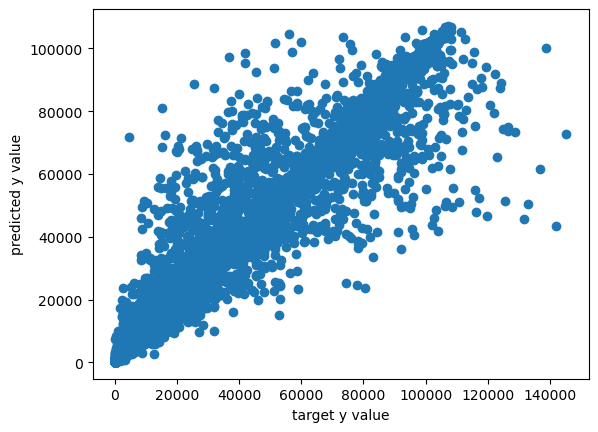

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel("target y value")
plt.ylabel("predicted y value")

In [30]:
pred_final=random_forest.predict(x_test)
MSE=mean_squared_error(pred_final,y_test)
r2_score=r2_score(y_test,pred_final)

print("pred_final:",pred_final)
print("MSE:",MSE)
print("r2_score:",r2_score)

pred_final: [ 6988.33    119.9   54290.81  ...  2474.525   125.275   123.505]
MSE: 68211287.7646882
r2_score: 0.9324545003878831


##### Prediction

In [31]:
print(x.columns)
random_forest.predict([[48,30.46,59,117.39,5.62,9,29,23,55,13,18,13]])

Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Speed', 'month', 'day', 'Hour', 'Minute', 'RiseMinute', 'SetHour',
       'SetMinute'],
      dtype='object')


C:\Users\Rajina Nisar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([120.455])

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your solar radiation dataset
df = pd.read_excel('solar radiation dataset.xlsx')

In [33]:
print(df.head())
print(df.info())
print(df.describe())

     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data column

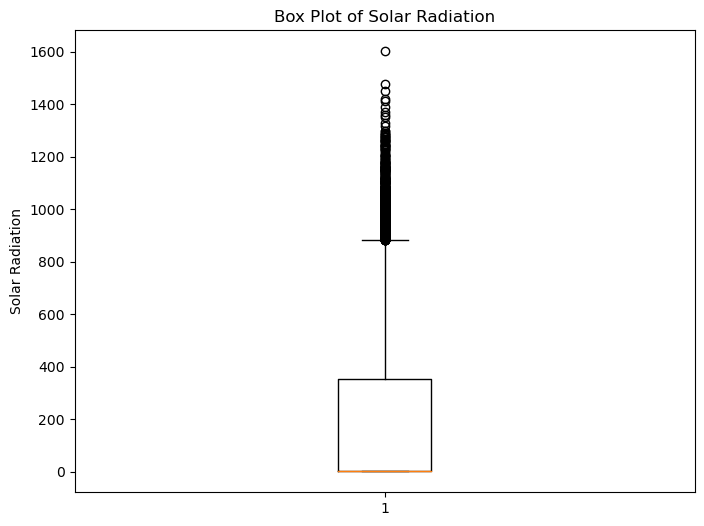

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Radiation'])
plt.title('Box Plot of Solar Radiation')
plt.ylabel('Solar Radiation')
plt.show()

In [35]:
Q1 = df['Radiation'].quantile(0.25)
Q3 = df['Radiation'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Radiation'] < lower_bound) | (df['Radiation'] > upper_bound)]
print('Potential Outliers:')
print(outliers)

Potential Outliers:
         UNIXTime                    Data      Time  Radiation  Temperature  \
117    1475194220   9/29/2016 12:00:00 AM  14:10:20     890.52           62   
118    1475193619   9/29/2016 12:00:00 AM  14:00:19     911.06           62   
119    1475193320   9/29/2016 12:00:00 AM  13:55:20     925.16           62   
120    1475193020   9/29/2016 12:00:00 AM  13:50:20     933.15           62   
121    1475192721   9/29/2016 12:00:00 AM  13:45:21     942.73           62   
...           ...                     ...       ...        ...          ...   
29813  1481673001  12/13/2016 12:00:00 AM  13:50:01    1043.97           52   
29815  1481672402  12/13/2016 12:00:00 AM  13:40:02     916.04           52   
29816  1481672102  12/13/2016 12:00:00 AM  13:35:02     950.18           51   
29818  1481671503  12/13/2016 12:00:00 AM  13:25:03     916.62           52   
30428  1481488555     2016-11-12 00:00:00  10:35:55    1010.05           52   

       Pressure  Humidity  Wind

In [36]:
df_no_outliers = df[(df['Radiation'] >= lower_bound) & (df['Radiation'] <= upper_bound)]

In [37]:
df_no_outliers

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,2016-01-12 00:00:00,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,2016-01-12 00:00:00,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,2016-01-12 00:00:00,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,2016-01-12 00:00:00,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [38]:
import numpy as np

df['Radiation_log'] = np.log1p(df['Radiation'])

In [39]:
df['Radiation_log']=df['Radiation']

In [40]:
#df['solar_radiation_winsorized'] = df['Radiation'].clip(lower=lower_bound, upper=upper_bound

In [41]:
df.shape

(32686, 12)

In [42]:
data=df.drop("Radiation_log",axis=1)

In [43]:
data.rename(columns={"Data":"Date"},inplace=True)

In [44]:
data["Date"]=pd.to_datetime(data["Date"])

C:\Users\Rajina Nisar\AppData\Local\Temp\ipykernel_632\1514947934.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"]=pd.to_datetime(data["Date"])


In [45]:
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day

In [46]:
data["Time"]=pd.to_datetime(data["Time"],format="%H:%M:%S")
data["TimeSunSet"]=pd.to_datetime(data["TimeSunSet"],format="%H:%M:%S")
data["TimeSunRise"]=pd.to_datetime(data["TimeSunRise"],format="%H:%M:%S")

In [47]:
data["Hour"]=pd.DatetimeIndex(data["Time"]).hour
data["Minute"]=pd.DatetimeIndex(data["Time"]).minute
data["RiseHour"]=pd.DatetimeIndex(data["TimeSunRise"]).hour
data["RiseMinute"]=pd.DatetimeIndex(data["TimeSunRise"]).minute
data["SetHour"]=pd.DatetimeIndex(data["TimeSunSet"]).hour
data["SetMinute"]=pd.DatetimeIndex(data["TimeSunSet"]).minute

data.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,day,Hour,Minute,RiseHour,RiseMinute,SetHour,SetMinute
0,1475229326,2016-09-29,1900-01-01 23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,55,6,13,18,13
1,1475229023,2016-09-29,1900-01-01 23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,50,6,13,18,13
2,1475228726,2016-09-29,1900-01-01 23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,45,6,13,18,13
3,1475228421,2016-09-29,1900-01-01 23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,40,6,13,18,13
4,1475228124,2016-09-29,1900-01-01 23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,35,6,13,18,13


In [48]:
data=data.drop(columns=["Time","UNIXTime","Date","TimeSunSet","TimeSunRise","RiseHour"],axis=1)
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,Hour,Minute,RiseMinute,SetHour,SetMinute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,13,18,13


In [49]:
x=data.drop("Radiation",axis=1)
y=data["Radiation"].apply(lambda x:int(x*100))

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=101)

In [51]:
random_forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [52]:
random_forest.score(x_test,y_test)

0.9328215754993021

In [53]:
random_forest.score(x_train,y_train)

0.9913365813444787

In [54]:
#import pickle

In [55]:
#pickle.dump(random_forest,open('random_forest.pickle','wb'))


In [56]:
import pickle 
pickle.dump(random_forest,open('Model','wb'))